In [40]:
import pandas as pd
df = pd.read_csv('./data/data.csv')
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [41]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')

In [43]:
#using 'Order Placed At' column to create a proper time series dataset containing date and hour of the day columns
df['Order Placed At'] = pd.to_datetime(df['Order Placed At'], format='%I:%M %p, %B %d %Y')
df['date'] = df['Order Placed At'].dt.date
df['hour'] = df['Order Placed At'].dt.hour
df['day'] = df['Order Placed At'].dt.day
df['month'] = df['Order Placed At'].dt.month

In [44]:
print(df[['Order Placed At', 'date', 'hour','day','month']].head())
df = df.drop(columns=['Order Placed At'])

      Order Placed At        date  hour  day  month
0 2024-09-10 23:38:00  2024-09-10    23   10      9
1 2024-09-10 23:34:00  2024-09-10    23   10      9
2 2024-09-10 15:52:00  2024-09-10    15   10      9
3 2024-09-10 15:45:00  2024-09-10    15   10      9
4 2024-09-10 15:04:00  2024-09-10    15   10      9


In [45]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Status', 'Delivery', 'Distance', 'Items in order',
       'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID', 'date', 'hour', 'day',
       'month'],
      dtype='object')

In [46]:
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Status,Delivery,Distance,Items in order,Instructions,...,Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID,date,hour,day,month
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,...,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...,2024-09-10,23,10,9
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,...,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...,2024-09-10,23,10,9
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,...,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...,2024-09-10,15,10,9
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,...,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...,2024-09-10,15,10,9
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,...,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...,2024-09-10,15,10,9


In [47]:
output_filename = './data/order_history_timeseries.csv'
df.to_csv(output_filename, index=False)

In [48]:
restaurant = 'Swaad'  
date = '2024-09-10'

target_date = pd.to_datetime(date).date()
filtered_orders = df[
        (df['Restaurant name'] == restaurant) & 
        (df['date'] == target_date)
    ]

In [49]:
filtered_orders.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Status,Delivery,Distance,Items in order,Instructions,...,Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID,date,hour,day,month
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,...,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...,2024-09-10,23,10,9
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,...,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...,2024-09-10,23,10,9
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,...,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...,2024-09-10,15,10,9
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,...,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...,2024-09-10,15,10,9
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,...,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...,2024-09-10,15,10,9


In [50]:
total_orders = len(filtered_orders)
print(total_orders)

33


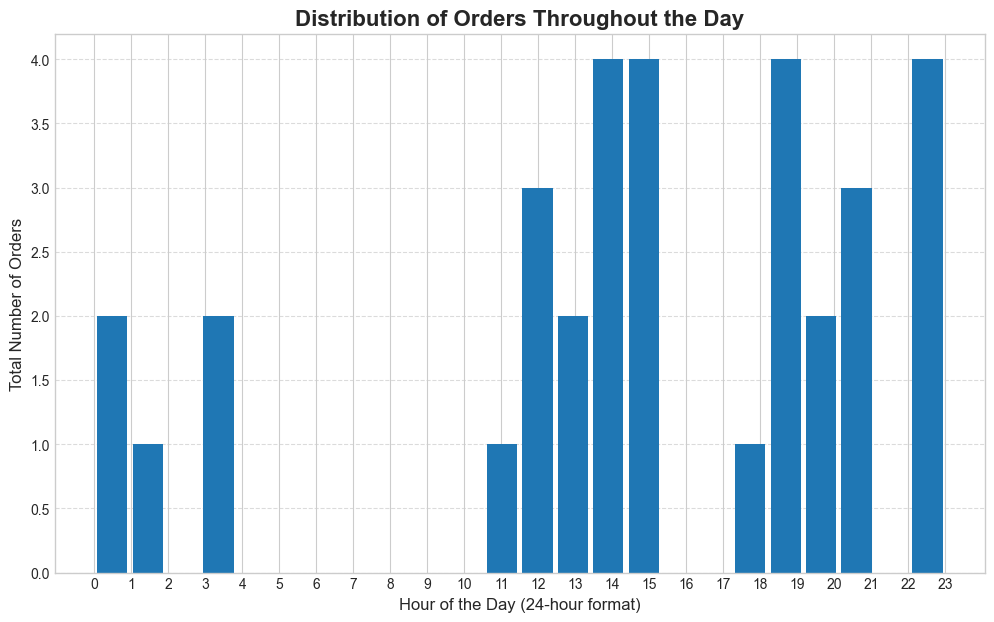

In [51]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid') 
plt.figure(figsize=(12, 7))
plt.hist(filtered_orders['hour'], bins=24, rwidth=0.85)
plt.title('Distribution of Orders Throughout the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Total Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

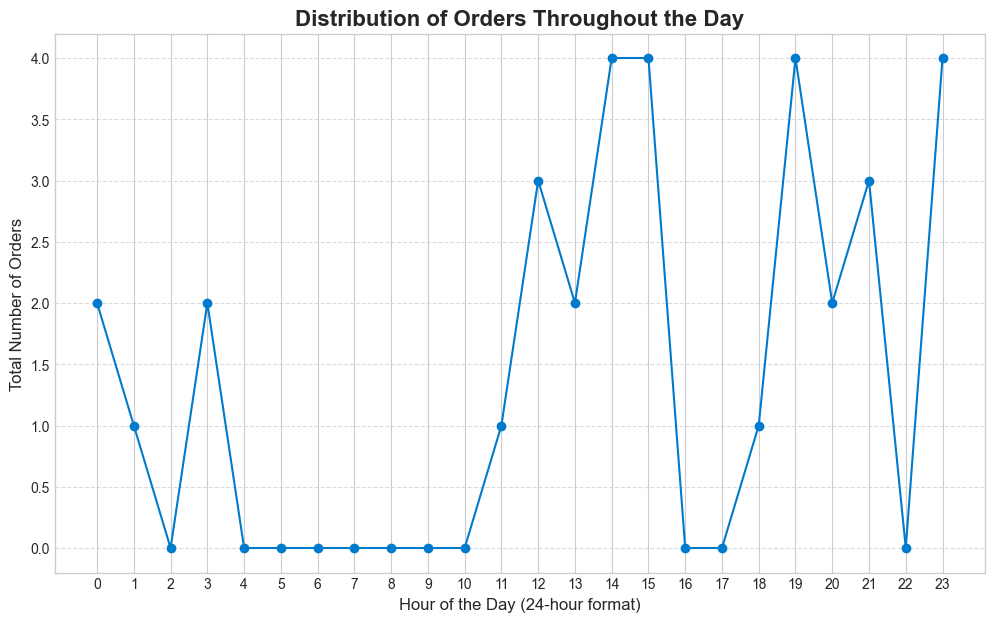

In [52]:
#count the number of orders for each hour
hourly_counts = filtered_orders['hour'].value_counts()
#fill in '0' for any hours that had no orders
hourly_counts = hourly_counts.reindex(range(0, 24), fill_value=0).sort_index()
#get the hours and counts for the plot
x = hourly_counts.index
y = hourly_counts.values

plt.style.use('seaborn-v0_8-whitegrid') 
plt.figure(figsize=(12, 7))
plt.plot(x, y, marker='o', linestyle='-', color='#007ACC') # Using new x and y

plt.title('Distribution of Orders Throughout the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Total Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

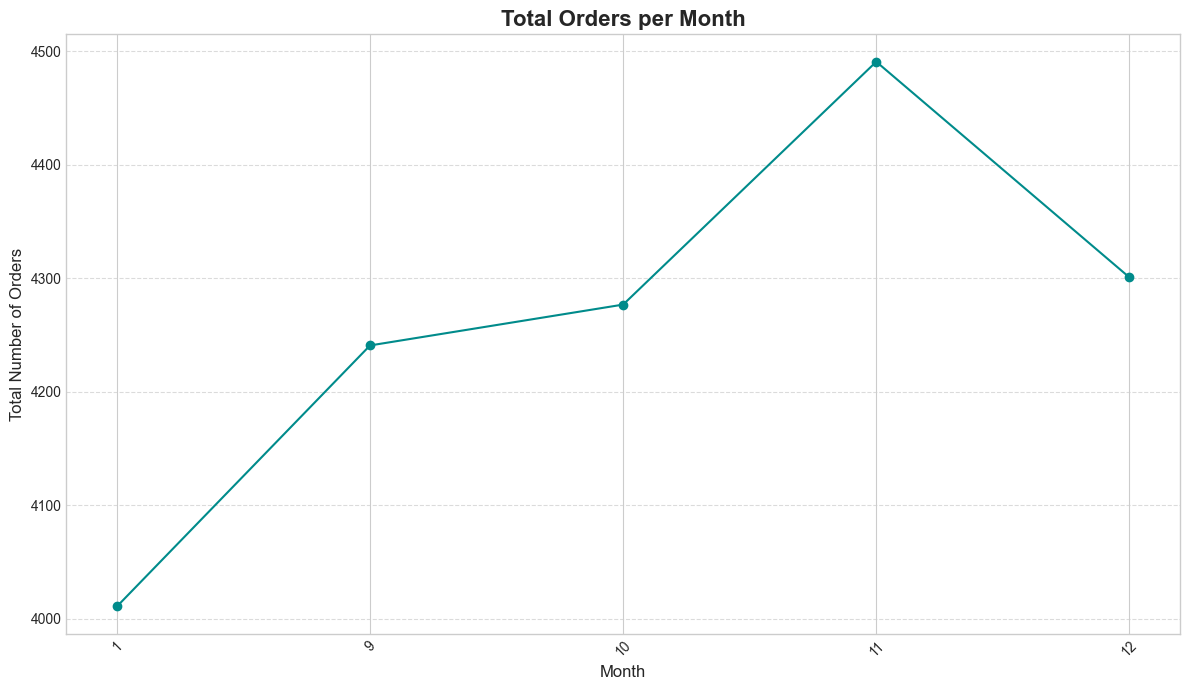

In [55]:
monthly_counts = df['month'].value_counts().sort_index()
x = monthly_counts.index.astype(str)
y = monthly_counts.values

plt.style.use('seaborn-v0_8-whitegrid') 
plt.figure(figsize=(12, 7))

plt.plot(x, y, marker='o', linestyle='-', color='#008B8B')
plt.title('Total Orders per Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Number of Orders', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
    
plt.tight_layout() 
    
plt.show()

In [ ]:
df = pd.read_csv('./data/order_history_timeseries.csv')

In [65]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Status', 'Delivery', 'Distance', 'Items in order',
       'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID', 'date', 'hour', 'day',
       'month'],
      dtype='object')

Correlation Matrix:


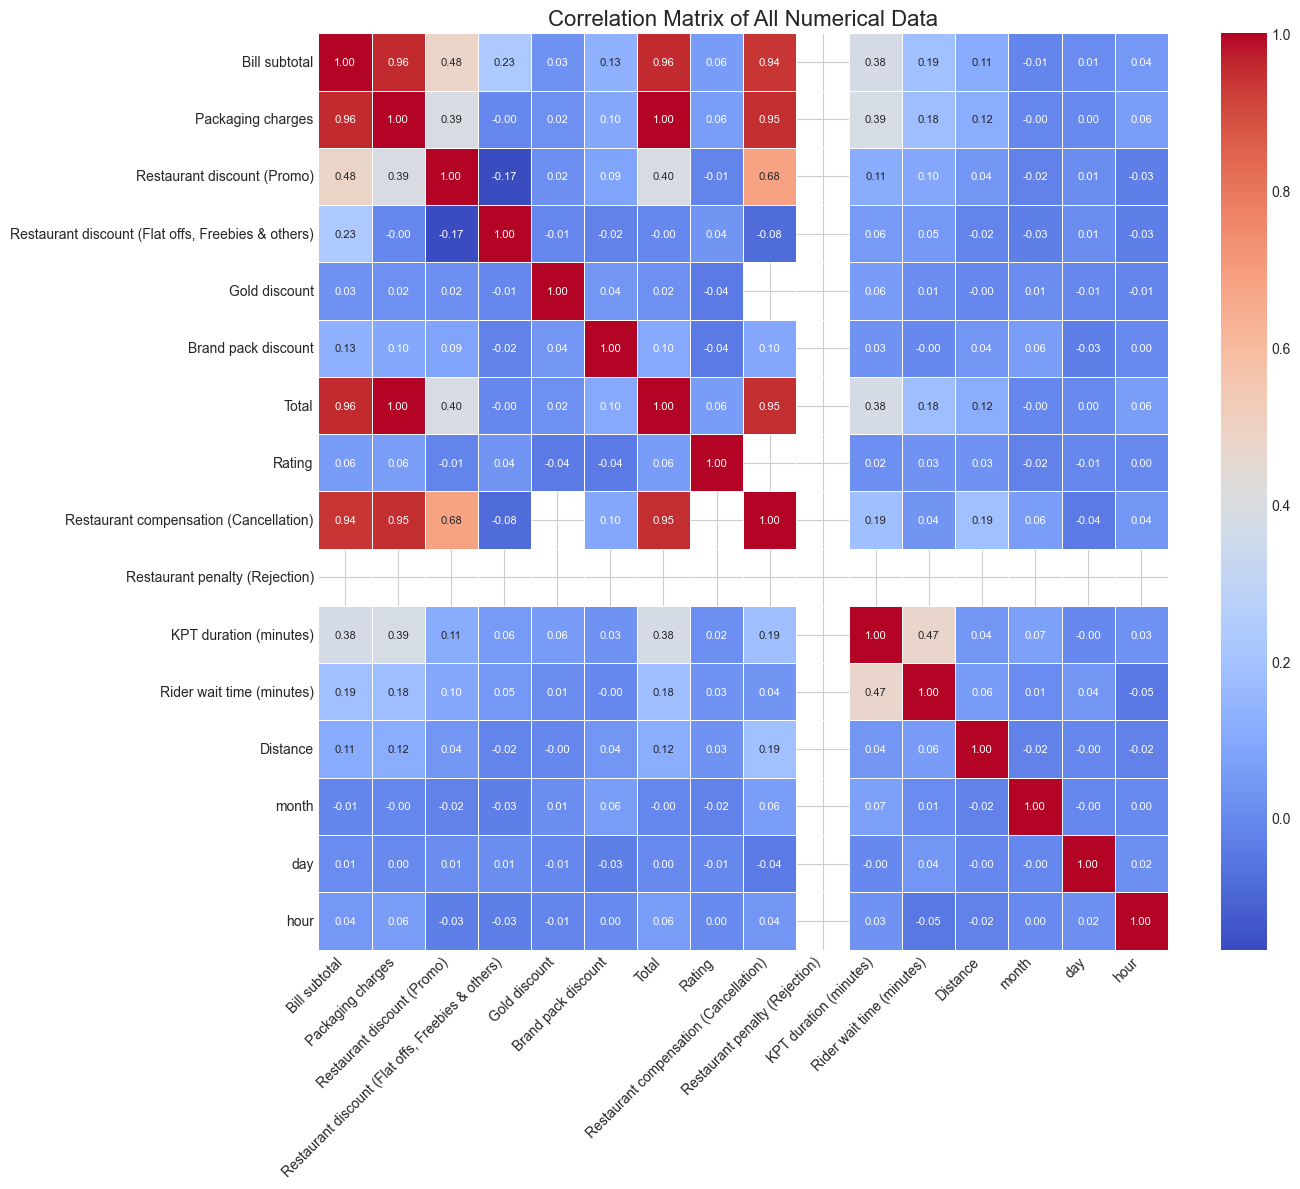

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# clean data: Convert 'Distance' from text to a number
# Handle '<1' by replacing it with a numerical value (e.g., 0.5)
# Handle 'km' by removing the text
df['Distance'] = df['Distance'].str.replace('<1', '0.5', regex=False)
df['Distance'] = df['Distance'].str.replace('km', '', regex=False)
df['Distance'] = df['Distance'].astype(float)

# select all numerical columns for the correlation matrix
numerical_cols = [
    'Bill subtotal', 
    'Packaging charges', 
    'Restaurant discount (Promo)',
    'Restaurant discount (Flat offs, Freebies & others)',
    'Gold discount',
    'Brand pack discount',
    'Total', 
    'Rating', 
    'Restaurant compensation (Cancellation)',
    'Restaurant penalty (Rejection)',
    'KPT duration (minutes)', 
    'Rider wait time (minutes)', 
    'Distance',
    'month',
    'day',
    'hour'
]

# Calculate the correlation matrix
# .corr() automatically handles NaNs, e.g., in 'Rating'
corr_matrix = df[numerical_cols].corr()

# Print the correlation matrix to the console
print("Correlation Matrix:")

# Plot the matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix, 
    annot=True,     # Show the correlation numbers
    cmap='coolwarm',# Use a blue-to-red color scheme
    fmt='.2f',      # Format the numbers to 2 decimal places
    linewidths=.5,
    annot_kws={"size": 8} # Make annotations smaller to fit
)
plt.title('Correlation Matrix of All Numerical Data', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust plot to prevent labels from being cut off
plt.show()